# Error-Trend-Seasonality Models
The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS). Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.

- We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time.

- A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded["airline_passengers.csv"]),index_col="Month",parse_dates=True)

In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


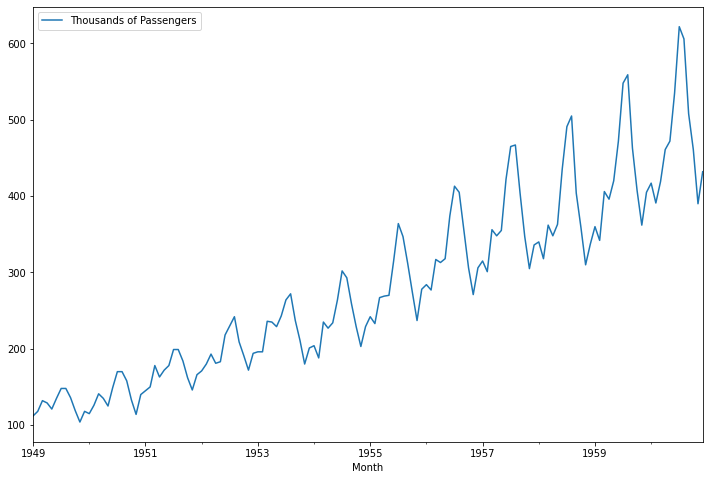

In [8]:
# Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear.
# That's why we will use the multiplicative model
df.plot(figsize=(12,8));

In [9]:
# Apply decomposition
result = seasonal_decompose(df["Thousands of Passengers"], model="multiplicative")

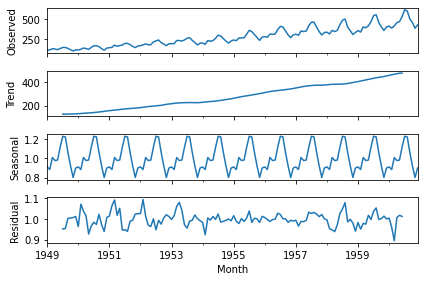

In [10]:
result.plot();